<a href="https://colab.research.google.com/github/jaejunchoe/HAIDS-Lab/blob/main/Transnet_Preprocessing_Subscription_Boxes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 준비준비

In [ ]:
## 1번 실행 -> 런타임 다시 시작 -> 2번 실행 -> 3번 실행

## 1번

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and direc

In [ ]:
## 2번

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

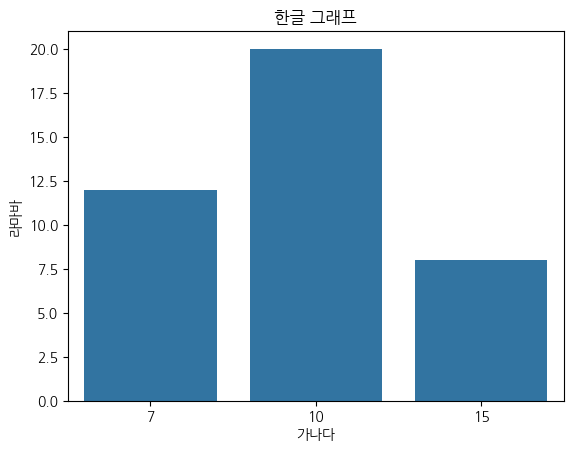

In [ ]:
## 3번

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 폰트 경로 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

# 그래프 그리기 예시
data = {'가나다': [10, 15, 7], '라마바': [20, 8, 12]}
df = pd.DataFrame(data)
sns.barplot(data=df, x='가나다', y='라마바')
plt.title('한글 그래프')
plt.show()


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Subscription_Boxes

https://amazon-reviews-2023.github.io/

In [ ]:
import json
import gzip
import requests

# 파일 URL
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Subscription_Boxes.jsonl.gz'

# 파일 다운로드
response = requests.get(url)
file_content = response.content

# gzip으로 압축 해제
decompressed = gzip.decompress(file_content)

# 파일 읽기 및 JSON 파싱
for line in decompressed.decode('utf-8').splitlines():
    # JSON 객체로 변환하여 출력
    print(json.loads(line.strip()))


In [ ]:
import json
import gzip
import requests
import pandas as pd

# 파일 URL
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Subscription_Boxes.jsonl.gz'

# 파일 다운로드
response = requests.get(url)
file_content = response.content

# gzip으로 압축 해제
decompressed = gzip.decompress(file_content)

# JSON 데이터를 저장할 리스트
data = []

# 파일 읽기 및 JSON 파싱
for line in decompressed.decode('utf-8').splitlines():
    # JSON 객체로 변환하여 리스트에 추가
    data.append(json.loads(line.strip()))

# pandas DataFrame으로 변환
df = pd.DataFrame(data)

# DataFrame을 Excel 파일로 저장
output_file = '/content/drive/MyDrive/IDS/amaxon reviews 2023/dataset/Subscription Boxes_Reviews_ver01.xlsx'
df.to_excel(output_file, index=False)


In [ ]:
import pandas as pd

Data loading and Transform to pandas

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/IDS/amaxon reviews 2023/dataset/Subscription Boxes_Reviews_ver01.xlsx')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16216 entries, 0 to 16215
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             16216 non-null  int64 
 1   title              16212 non-null  object
 2   text               16212 non-null  object
 3   images             16216 non-null  object
 4   asin               16216 non-null  object
 5   parent_asin        16216 non-null  object
 6   user_id            16216 non-null  object
 7   timestamp          16216 non-null  int64 
 8   helpful_vote       16216 non-null  int64 
 9   verified_purchase  16216 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 1.1+ MB


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1,USELESS,Absolutely useless nonsense and a complete was...,[],B07G584SHG,B09WC47S3V,AEMJ2EG5ODOCYUTI54NBXZHDJGSQ,1602133857705,2,True
1,2,Manufactured where?,"With a couple of the items, I wasn't quite sur...",[],B07QL1JRCN,B07QL1JRCN,AEEJBFZKUBEEMBZUZJV4UHFVEEBQ,1609110735433,20,True
2,1,Little bang for your buck.,Two SMALL stuffed animals and 2 little bags of...,[],B07RBYJN37,B08N5QKX1Y,AGSVZNZBTSGQBKZDZTQYEZHGDPCQ,1609937315319,4,True
3,5,New favorite box,"Although I don’t remember signing up for this,...",[],B07KM6T8GV,B07KM6T8GV,AFDERNB6BIR3U2DOR3S2KX7KJJXQ,1616156351887,1,True
4,5,Coctique,I loved every thing and could use it all. Thin...,[],B07NVL6TJG,B07NVKNVNM,AE6P2YJ6FKX332MD56GPJFSHXNJQ,1559533206066,0,True


# Data Processing

# Filtered to 'verified_purchase' = True

**'verified_purchase' = 구매인증**


구매인증된 데이터만 filtering하여 데이터 신뢰성 확보 (disscusion by Prof)

In [ ]:
df = df[df['verified_purchase'] == True]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14262 entries, 0 to 16214
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             14262 non-null  int64 
 1   title              14258 non-null  object
 2   text               14258 non-null  object
 3   images             14262 non-null  object
 4   asin               14262 non-null  object
 5   parent_asin        14262 non-null  object
 6   user_id            14262 non-null  object
 7   timestamp          14262 non-null  int64 
 8   helpful_vote       14262 non-null  int64 
 9   verified_purchase  14262 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 1.1+ MB


구매인증이 False인 데이터가 있는지 다시 한 번 확인.

In [ ]:
vertificated_df = df[df['verified_purchase'] == False]

vertificated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             0 non-null      int64 
 1   title              0 non-null      object
 2   text               0 non-null      object
 3   images             0 non-null      object
 4   asin               0 non-null      object
 5   parent_asin        0 non-null      object
 6   user_id            0 non-null      object
 7   timestamp          0 non-null      int64 
 8   helpful_vote       0 non-null      int64 
 9   verified_purchase  0 non-null      bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 0.0+ bytes


# Remove duplicated review data

Reivew Data가 중복인 데이터 제거

In [ ]:
# 중복된 행 확인

duplicated = df[df.duplicated(subset=['rating', 'text', 'asin', 'user_id'], keep=False)]

duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 1055 to 16170
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             336 non-null    int64 
 1   title              334 non-null    object
 2   text               336 non-null    object
 3   images             336 non-null    object
 4   asin               336 non-null    object
 5   parent_asin        336 non-null    object
 6   user_id            336 non-null    object
 7   timestamp          336 non-null    int64 
 8   helpful_vote       336 non-null    int64 
 9   verified_purchase  336 non-null    bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 26.6+ KB


In [ ]:
print("중복된 행:")
print(duplicated)
print("중복된 행 개수:", duplicated.shape[0])


중복된 행:
       rating                                              title  \
1055        2                                                NaN   
1056        2                                                NaN   
1098        1  Would think 3 or 4 times before ordering this box   
1099        1  Overpriced Box of Horrible Tasting Snacks. It’...   
1407        4                                 More Makeup please   
...       ...                                                ...   
16081       5  Beggar's Banquet 50th Anniversary edition? Yes...   
16082       5  Beggar's Banquet 50th Anniversary edition? Yes...   
16168       5                                             Great!   
16169       5                                             Great!   
16170       5                                             Great!   

                                                    text  \
1055   Tried twice & each time DARK lipstick I won’t ...   
1056   Tried twice & each time DARK lipstick I won’t ...

In [ ]:
# 중복된 행을 하나만 유지 (keep='last'로 마지막 번째 중복된 행을 남김)
    ## keep= 'fisrt' -> 이거 쓰셔도 됩니다.

df = df.drop_duplicates(subset=['rating', 'text', 'asin', 'user_id'], keep='last')

print("중복 제거 후 데이터 크기:", df.shape)

# 결과 출력
print("중복 제거된 데이터 (첫 번째 중복만 유지):")
print(df)

중복 제거 후 데이터 크기: (14082, 10)
중복 제거된 데이터 (첫 번째 중복만 유지):
       rating                                              title  \
0           1                                            USELESS   
1           2                                Manufactured where?   
2           1                         Little bang for your buck.   
3           5                                   New favorite box   
4           5                                           Coctique   
...       ...                                                ...   
16209       3                                       Esperaba más   
16210       5                                            5 Stars   
16211       5                                       Very pleased   
16212       1                                             ??????   
16214       1  If you’re looking for a box, you have the wron...   

                                                    text  \
0      Absolutely useless nonsense and a complete was...   
1      Wi

중복 제거 실행 후 검증

In [ ]:
# 중복된 행 확인
duplicates = df[df.duplicated(subset=['rating', 'text', 'asin', 'user_id'], keep=False)]

print("중복된 행:")
print(duplicates)
print("중복된 행 개수:", duplicates.shape[0])


중복된 행:
Empty DataFrame
Columns: [rating, title, text, images, asin, parent_asin, user_id, timestamp, helpful_vote, verified_purchase]
Index: []
중복된 행 개수: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14082 entries, 0 to 16214
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             14082 non-null  int64 
 1   title              14079 non-null  object
 2   text               14078 non-null  object
 3   images             14082 non-null  object
 4   asin               14082 non-null  object
 5   parent_asin        14082 non-null  object
 6   user_id            14082 non-null  object
 7   timestamp          14082 non-null  int64 
 8   helpful_vote       14082 non-null  int64 
 9   verified_purchase  14082 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 1.1+ MB


# text(review)가 없는 행의 정보 추출

In [ ]:
# 필요한 변수(rating, text, asin, user_id)만 추출
selected_columns = df[['rating', 'text', 'asin', 'user_id']]

# 추출된 데이터 확인
print(selected_columns.head())

   rating                                               text        asin  \
0       1  Absolutely useless nonsense and a complete was...  B07G584SHG   
1       2  With a couple of the items, I wasn't quite sur...  B07QL1JRCN   
2       1  Two SMALL stuffed animals and 2 little bags of...  B07RBYJN37   
3       5  Although I don’t remember signing up for this,...  B07KM6T8GV   
4       5  I loved every thing and could use it all. Thin...  B07NVL6TJG   

                        user_id  
0  AEMJ2EG5ODOCYUTI54NBXZHDJGSQ  
1  AEEJBFZKUBEEMBZUZJV4UHFVEEBQ  
2  AGSVZNZBTSGQBKZDZTQYEZHGDPCQ  
3  AFDERNB6BIR3U2DOR3S2KX7KJJXQ  
4  AE6P2YJ6FKX332MD56GPJFSHXNJQ  


In [ ]:
blank_review = selected_columns[selected_columns['text'].isnull()]

blank_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 4777 to 13805
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   4 non-null      int64 
 1   text     0 non-null      object
 2   asin     4 non-null      object
 3   user_id  4 non-null      object
dtypes: int64(1), object(3)
memory usage: 160.0+ bytes


In [ ]:
print(blank_review)

       rating text        asin                       user_id
4777        4  NaN  B07MGJZ2MH  AFEE2WA4Z6LGXZM2B66ZALQUSHIQ
6418        5  NaN  B08MW4C2BR  AH75XZ62WM5KJEMIK545MXZCMHLA
10401       3  NaN  B0742LVLMJ  AGNSO4H7UZ4TD5LZ3TOALCKRHEMA
13805       5  NaN  B07XGNHYC2  AEZPBFZWCX3DMLYYO5HMJ3DAFRXQ


    row num       rating text        asin                       user_id
    4777        4  NaN  B07MGJZ2MH  AFEE2WA4Z6LGXZM2B66ZALQUSHIQ
    6418        5  NaN  B08MW4C2BR  AH75XZ62WM5KJEMIK545MXZCMHLA
    10401       3  NaN  B0742LVLMJ  AGNSO4H7UZ4TD5LZ3TOALCKRHEMA
    13805       5  NaN  B07XGNHYC2  AEZPBFZWCX3DMLYYO5HMJ3DAFRXQ

전체 데이터셋 저장

In [ ]:
# 추출한 데이터를 새로운 엑셀 파일로 저장
output_file_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/preprocessing/241220_All_Subscription Boxes_Reviews_ver01.xlsx'
selected_columns.to_excel(output_file_path, index=False)

In [ ]:
file_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/preprocessing/241220_All_Subscription Boxes_Reviews_ver01.xlsx'

df = pd.read_excel(file_path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14082 entries, 0 to 14081
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   14082 non-null  int64 
 1   text     14078 non-null  object
 2   asin     14082 non-null  object
 3   user_id  14082 non-null  object
dtypes: int64(1), object(3)
memory usage: 440.2+ KB


In [ ]:
import json
import gzip

# 결과를 새로운 JSON 파일로 저장
output_file_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/preprocessing/241220_All_Subscription Boxes_Reviews_ver01.json.gz'


# JSON 파일 저장
df.to_json(output_file_path, orient='records', lines=True, compression='gzip', force_ascii=False)

print(f"파일이 저장되었습니다: {output_file_path}")

파일이 저장되었습니다: /content/drive/MyDrive/IDS/amaxon reviews 2023/preprocessing/241220_All_Subscription Boxes_Reviews_ver01.json.gz


In [ ]:

file_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/preprocessing/241220_All_Subscription Boxes_Reviews_ver01.json.gz'

# JSON.GZ 파일 읽기
df_loaded = pd.read_json(file_path, orient='records', lines=True, compression='gzip')

# 데이터프레임 크기 확인
print("불러온 데이터프레임의 크기 (shape):", df_loaded.shape)

불러온 데이터프레임의 크기 (shape): (14082, 4)


text(review)가 없는 데이터셋 저장

In [ ]:
# 추출한 데이터를 새로운 엑셀 파일로 저장
output_file_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/preprocessing/241220_Blank Review Dataset_Subscription Boxes_Reviews_ver01.xlsx'
blank_review.to_excel(output_file_path, index=False)

In [ ]:
file_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/preprocessing/241220_Blank Review Dataset_Subscription Boxes_Reviews_ver01.xlsx'

df = pd.read_excel(file_path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   4 non-null      int64  
 1   text     0 non-null      float64
 2   asin     4 non-null      object 
 3   user_id  4 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 256.0+ bytes


# 저장된 데이터셋에 대한 text(review) 전처리 및 파일 분류

train, vaild, test 파일 분류작업 및 전처리

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import WordPunctTokenizer

# Google Colab 환경에 맞게 파일 경로 설정
dataset_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/preprocessing/241220_임의로 채움_All_Review Dataset_Subscription Boxes_Reviews_ver01.json.gz'
stopwords_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/dataset/stopwords.txt'
punctuations_path = '/content/drive/MyDrive/IDS/amaxon reviews 2023/dataset/punctuations.txt'
save_dir = '/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2'

# save_dir = 'train valid test 데이터셋을 저장하는데 있어서 원하는 경로로 설정하면 됨'


def process_dataset(json_path, select_cols, train_rate, csv_path):
    print('#### Read the json file...')
    if json_path.endswith('gz'):
        df = pd.read_json(json_path, lines=True, compression='gzip')
    else:
        df = pd.read_json(json_path, lines=True)

    # step 1. user와 item에 따라 그룹화(선택된 컬럼으로 데이터 필터링)
    df = df[select_cols]
    df.columns = ['userID', 'itemID', 'review', 'rating']  # 이름을 통일

        ## map user(or item) to number
    df['userID'] = df.groupby(df['userID']).ngroup()
    df['itemID'] = df.groupby(df['itemID']).ngroup()


    # step 2. Stopwords와 punctuations 제거
        ## Stopword와 punctuations 제거
    with open(stopwords_path) as f:
        stop_words = set(f.read().splitlines())
    with open(punctuations_path) as f:
        punctuations = set(f.read().splitlines())

        ## 텍스트 전처리 함수
    def clean_review(review):
        review = review.lower()
        for p in punctuations:
            review = review.replace(p, ' ')
        review = WordPunctTokenizer().tokenize(review)
        review = [word for word in review if word not in stop_words]
        return ' '.join(review)

    # 텍스트 전처리 이후의 데이터셋에서 Null 값 제거 및 리뷰 전처리
    df = df.drop(df[[not isinstance(x, str) or len(x) == 0 for x in df['review']]].index)
    df['review'] = df['review'].apply(clean_review)

    # 데이터셋 분할
    train, valid = train_test_split(df, test_size=1 - train_rate, random_state=3)
    valid, test = train_test_split(valid, test_size=0.5, random_state=4)

    # 저장 디렉토리 생성
    os.makedirs(csv_path, exist_ok=True)
    train.to_csv(os.path.join(csv_path, 'train.csv'), index=False, header=False)
    valid.to_csv(os.path.join(csv_path, 'valid.csv'), index=False, header=False)
    test.to_csv(os.path.join(csv_path, 'test.csv'), index=False, header=False)

    print(f'#### Split and saved dataset as csv: train {len(train)}, valid {len(valid)}, test {len(test)}')
    print(f'#### Total: {len(df)} reviews, {len(df.groupby("userID"))} users, {len(df.groupby("itemID"))} items.')
    return train, valid, test


# Google Colab에서 직접 실행
if __name__ == '__main__':
    # 데이터셋 컬럼 설정 train:valid:test = 8:1:1
    select_cols = ['user_id', 'parent_asin', 'text', 'rating']
    train_rate = 0.8  # 학습 데이터 비율

    # 데이터셋 처리
    process_dataset(dataset_path, select_cols, train_rate, save_dir)
